In [48]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import scienceplots

from scipy.interpolate import RegularGridInterpolator
import random
import pandas

In [49]:
filename = "Data/paper2_sorted_data.txt"

In [50]:
M1,qin,qout,a,b,c,d = np.loadtxt(filename,unpack=True)

In [51]:
np.size(a)/16

6.0

In [52]:
a[:16]

array([21.2, 33.3, 19.9, 32.1,  7.7, 21.8, 36.5, 18.6,  4.5, 16.7, 37.2,
       19.2,  0.6,  9.6, 32.7, 25.6])

In [53]:
qin = [0.03162,0.1,0.3162,1]
qout = [0.03162,0.1,0.3162,1]
M1 = [10**10,10**9,10**8,10**7,10**6,10**5]

In [54]:
A = np.zeros((np.size(M1),np.size(qin),np.size(qout)))
B = np.zeros((np.size(M1),np.size(qin),np.size(qout)))
C = np.zeros((np.size(M1),np.size(qin),np.size(qout)))
D = np.zeros((np.size(M1),np.size(qin),np.size(qout)))

for i in range(np.size(M1)):
    a_M = a[16*i:16*(i+1)]
    b_M = b[16*i:16*(i+1)]
    c_M = c[16*i:16*(i+1)]
    d_M = d[16*i:16*(i+1)]
    for j in range(np.size(qin)):
        for k in range(np.size(qout)):
            A[i,j,k] = a_M[j*4+k]
            B[i,j,k] = b_M[j*4+k]
            C[i,j,k] = c_M[j*4+k]
            D[i,j,k] = d_M[j*4+k]

In [55]:
fA = RegularGridInterpolator((M1,qin,qout), A)
fB = RegularGridInterpolator((M1,qin,qout), B)
fC = RegularGridInterpolator((M1,qin,qout), C)
fD = RegularGridInterpolator((M1,qin,qout), D)

In [56]:
M1_ill,qin_ill,qout_ill = np.loadtxt("Data/triple-masses-from-illustris.txt",unpack=True)

In [57]:
def interp_result(M1,qin,qout,f_choice):
    #fchoice is between a,b,c,d
    
    if(f_choice == 'a' or f_choice == 'A'):
        if(M1 > 10**10):
            M1 = 10**10
        if(qout > 1):
            qout = 1
        if(qout < 0.03162):
            qout = 0.03162
        if(qin < 0.03162):
            qin = 0.03162
        return fA([M1,qin,qout])[0]
    
    if(f_choice == 'b' or f_choice == 'B'):
        if(M1 > 10**10):
            M1 = 10**10
        if(qout > 1):
            qout = 1
        if(qout < 0.03162):
            qout = 0.03162
        if(qin < 0.03162):
            qin = 0.03162
        return fB([M1,qin,qout])[0]

    if(f_choice == 'c' or f_choice == 'C'):
        if(M1 > 10**10):
            M1 = 10**10
        if(qout > 1):
            qout = 1
        if(qout < 0.03162):
            qout = 0.03162
        if(qin < 0.03162):
            qin = 0.03162
        return fC([M1,qin,qout])[0]

    if(f_choice == 'd' or f_choice == 'D'):
        if(M1 > 10**10):
            M1 = 10**10
        if(qout > 1):
            qout = 1
        if(qout < 0.03162):
            qout = 0.03162
        if(qin < 0.03162):
            qin = 0.03162
        return fD([M1,qin,qout])[0]

In [58]:
merger_p = np.zeros((len(qin),len(qout)))

In [59]:
for i in range(len(qin)):
    for j in range(len(qout)):
        merger_p[i,j] = A[0,i,j] + B[0,i,j] + C[0,i,j]

In [ ]:

X,Y = np.meshgrid(np.log10(qin),np.log10(qout))
plt.style.use('science')
plt.contour(Y,X, merger_p, colors='black');
plt.contourf(Y,X, merger_p, 20, cmap='viridis')
plt.xlabel("$\log q_{in}$")
plt.ylabel("$\log q_{out}$")
plt.colorbar()
plt.savefig("Figures/meshplot.pdf")

In [31]:
interp_result(M1_ill[0],qin_ill[0],qout_ill[0],"d")

2.130581564140493

In [32]:
print("x = %d"%(len(M1_ill)))

x = 531


In [33]:
mlist = [10**4,10**5,10**2]
mlist.remove(min(mlist))

In [34]:
sum(mlist)

110000

In [35]:
def chirp_m_merger(M1,qin,qout,flag="Tr-ej"):
    # flag = Tr-ej or Tr12 or Tr13 or Tr23
    
    M2 = qin*M1
    M3 = qout*(M1+M2)
    Trip_mlist = [M1,M2,M3]
    
    if(flag == "Tr-ej"):
        Trip_mlist.remove(min(Trip_mlist))
        Mtot = sum(Trip_mlist)
        chirp = (Trip_mlist[0] * Trip_mlist[1])**(3/5) / (Mtot)**(1/5)
    
    elif(flag == "Tr12"):
        chirp = (M1*M2)**(3/5) / (M1 + M2)**(1/5)

    elif(flag == "Tr13"):
        chirp = (M1*M3)**(3/5) / (M1 + M3)**(1/5)
        
    elif(flag == "Tr23"):
        chirp = (M3*M2)**(3/5) / (M3 + M2)**(1/5)    
    
    return chirp

In [36]:
chirp_m_merger(10**6,0.01,0.04,"Tr12")

62970.29461956147

In [37]:
M_mergers = []
merger_flags = []

In [38]:
M_mergers.append([1,2])

In [39]:
M_mergers

[[1, 2]]

In [40]:
def trip_outcome_trial(N):
    
    M1_mergers = []
    M2_mergers = []
    merger_flags = []
    
    for i in range(N):
        
        no_merger = 0
        prompt_merger = 0
        ejection_then_merger = 0
        
        N_triples = len(M1_ill)
        
        for j in range(N_triples):
            
            #random number draw
            P = random.uniform(0,1)
    
            a_P = interp_result(M1_ill[j],qin_ill[j],qout_ill[j],"a")*0.01
            b_P = interp_result(M1_ill[j],qin_ill[j],qout_ill[j],"b")*0.01
            c_P = interp_result(M1_ill[j],qin_ill[j],qout_ill[j],"c")*0.01
            d_P = interp_result(M1_ill[j],qin_ill[j],qout_ill[j],"d")*0.01
            
            #masses of the triples
            M1 = M1_ill[j]
            M2 = qin_ill[j] * M1_ill[j]
            M3 = qout_ill[j] * (M1 + M2)
        
    
            #prompt merger
            if(P < a_P+b_P+c_P):
                
                flag = "Tr"
                merger_flags.append(flag)
                prompt_merger = prompt_merger + 1
                
                if(P <= a_P):
                    M1_mergers.append(M1)
                    M2_mergers.append(M2)
                    
                elif(P > a_P and P <= a_P+b_P):
                    M1_mergers.append(M1)
                    M2_mergers.append(M3)
                    
                elif(P > a_P+b_P and P <= a_P+b_P+c_P):
                    M1_mergers.append(M2)
                    M2_mergers.append(M3)
                    
            elif(P > a_P+b_P+c_P and P <= a_P+b_P+c_P+d_P):
            #merger after ejection
                flag = "Tr-ej"
                merger_flags.append(flag)
                ejection_then_merger = ejection_then_merger + 1
                
                Trip_mlist = [M1,M2,M3]
                Trip_mlist.remove(min(Trip_mlist))
                M1_mergers.append(Trip_mlist[0])
                M2_mergers.append(Trip_mlist[1])
                
            elif(P > a_P + b_P + c_P + d_P):
                no_merger = no_merger + 1
            
    print("The total number of triple candidates: %d"%(N_triples))
    print("Prompt Mergers: %d"%(prompt_merger))
    print("Mergers after ejection: %d"%(ejection_then_merger))
    print("No-mergers: %d"%(no_merger))
    
    return M1_mergers,M2_mergers,merger_flags

In [41]:
M1m,M2m,mflags = trip_outcome_trial(1)

The total number of triple candidates: 531
Prompt Mergers: 119
Mergers after ejection: 46
No-mergers: 366


In [42]:
import pandas as pd

In [43]:
triples_df = pd.DataFrame(list(zip(M1m,M2m,mflags)),
               columns =['Mass 1', 'Mass 2','Flag'])

In [44]:
triples_df

,Mass 1,Mass 2,Flag
0,8.639893e+06,2.953300e+06,Tr
1,1.684982e+07,3.972500e+06,Tr
2,1.565255e+07,2.738576e+06,Tr
3,1.507277e+09,2.978037e+08,Tr-ej
4,4.206357e+09,6.266152e+08,Tr-ej
...,...,...,...
160,1.712377e+11,1.583394e+09,Tr
161,4.433939e+08,6.895766e+07,Tr
162,1.089103e+07,2.158876e+07,Tr-ej
163,2.579696e+08,5.555056e+07,Tr-ej


In [45]:
df1 = triples_df[triples_df['Flag']=='Tr']
df2 = triples_df[triples_df['Flag']=='Tr-ej']

(array([1., 1., 4., 4., 6., 7., 8., 5., 4., 4., 1., 1.]),
 array([6.71579733, 6.98741282, 7.25902832, 7.53064381, 7.8022593 ,
        8.07387479, 8.34549028, 8.61710577, 8.88872126, 9.16033675,
        9.43195224, 9.70356773, 9.97518322]),
 <BarContainer object of 12 artists>)

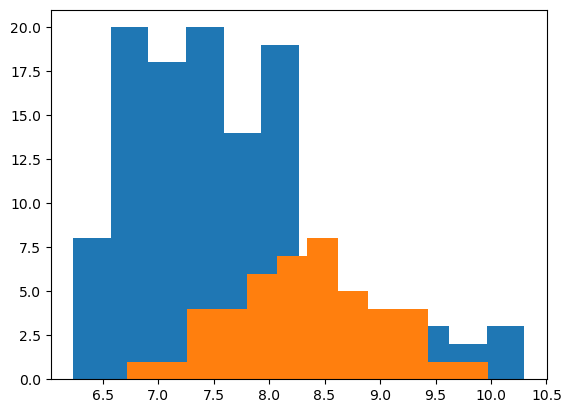

In [46]:
m11 = df1["Mass 1"].to_numpy()
m12 = df1["Mass 2"].to_numpy()

m21 = df2["Mass 1"].to_numpy()
m22 = df2["Mass 2"].to_numpy()

mchirp1 = (m11 * m12)**(3/5)/(m11 + m12)**(1/5)
plt.hist(np.log10(mchirp1),bins = 12)

mchirp2 = (m21 * m22)**(3/5)/(m21 + m22)**(1/5)
plt.hist(np.log10(mchirp2),bins = 12)

In [474]:
len(df2.loc[(df2['Mass 1']>10**7) & (df2['Mass 1']<10**8)]['Flag'])

46

In [369]:
np.size(Mc_Tr+Mc_Tr_ej)

152

In [370]:
Mc_Tr = np.array(Mc_Tr)
Mc_Tr_ej = np.array(Mc_Tr_ej)

In [385]:
np.count_nonzero((Mc_Tr >= 10**8) & (Mc_Tr < 10**9))

24

In [386]:
np.count_nonzero((Mc_Tr_ej >= 10**8) & (Mc_Tr_ej < 10**9))

21

In [387]:
24/(24+21)

0.5333333333333333

In [384]:
12/(12+49)

0.19672131147540983

In [377]:
(np.count_nonzero((Mc_Tr_ej >= 10**8) & (Mc_Tr_ej < 10**9)))/531 * 100

3.954802259887006

In [373]:
(np.count_nonzero(Mc_Tr >= 10**9))/531 * 100

1.3182674199623352

In [380]:
Tr_ej_total[0]/531 * 100

9.03954802259887

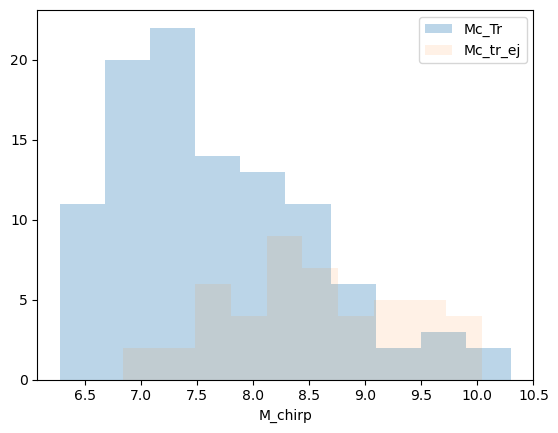

In [374]:
plt.hist(np.log10(Mc_Tr),label="Mc_Tr",alpha=0.3)
plt.hist(np.log10(Mc_Tr_ej),label="Mc_tr_ej",alpha=0.1)
plt.legend()
plt.xlabel("M_chirp")
plt.show()

In [272]:
111/531

0.20903954802259886

In [277]:
np.array(Tr_total)/531 * 100

array([20.71563089, 21.09227872, 21.65725047, 22.22222222, 23.16384181,
       21.65725047, 19.7740113 , 19.20903955, 18.45574388, 22.22222222])

In [278]:
np.array(Tr_ej_total)/531 * 100

array([10.35781544,  9.98116761,  9.60451977,  9.79284369,  6.96798493,
        6.21468927,  9.03954802,  8.28625235,  9.03954802,  7.7212806 ])

In [268]:
for i in range(10):
    print((Tr_total[i]/(Tr_total[i] + Tr_ej_total[i]))*100)

66.66666666666666
67.87878787878789
69.27710843373494
69.41176470588235
76.875
77.7027027027027
68.62745098039215
69.86301369863014
67.12328767123287
74.21383647798741


In [260]:
46/(116+46)

0.2839506172839506

In [122]:
fn([21507371.426361017,0.2,0.1])

array([9.92377428])

In [234]:
125/531

0.23540489642184556

In [235]:
39/531

0.07344632768361582

In [191]:
idx = []

In [192]:
for i in range(len(M1_ill)):
    if(qin_ill[i]<=1 and qin_ill[i]>=0.03162 and qout_ill[i]<=1 and qout_ill[i]>=0.03162 and M1_ill[i]<=10**10 and M1_ill[i]>=10**5):
        idx.append(i)

In [214]:
np.size(np.argwhere(qout_ill>1))

131

In [210]:
np.size(qin_ill)

531

In [209]:
np.size(idx)

256

In [199]:
pa = []

In [200]:
for i in range(len(idx)):
    pa.append(fn([M1_ill[idx[i]],qin_ill[idx[i]],qout_ill[idx[i]]])[0])

(array([17., 23., 19., 30., 11., 27., 22., 33., 62., 12.]),
 array([ 1.35728204,  3.99479616,  6.63231028,  9.26982439, 11.90733851,
        14.54485263, 17.18236674, 19.81988086, 22.45739497, 25.09490909,
        27.73242321]),
 <BarContainer object of 10 artists>)

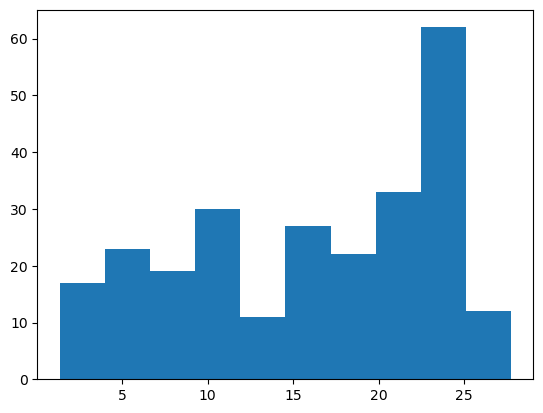

In [204]:
plt.hist(pa)